# E-commerce : segmentation des clients et prédiction des ventes

## Exploration et nettoyage des données

In [7]:
import pandas as pd

orders_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_orders_dataset.csv" ,sep=",")
order_items_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_order_items_dataset.csv", sep=",")
customers_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_customers_dataset.csv" ,sep=",")
geolocation_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_geolocation_dataset.csv" ,sep=",")
products_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_products_dataset.csv" ,sep=",")
sellers_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_sellers_dataset.csv" ,sep=",")
category_translation_df = pd.read_csv(r"C:\Users\DELL\Downloads\product_category_name_translation.csv" ,sep=",")
payments_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_order_payments_dataset.csv" , sep="," )
reviews_df = pd.read_csv(r"C:\Users\DELL\Downloads\olist_order_reviews_dataset.csv" , on_bad_lines="skip", encoding="ISO-8859-1")

print("Orders DataFrame:")
print(orders_df.head())

print("\nOrder Items DataFrame:")
print(order_items_df.head())

print("\nSellers DataFrame:")
print(sellers_df.head())

print("\nPayments DataFrame:")
print(payments_df.head())

print("\nReviews DataFrame:")
print(reviews_df.head())

print("\nCustomers DataFrame:")
print(customers_df.head())

print("\nGeolocation DataFrame:")
print(geolocation_df.head())

print("\nProducts DataFrame:")
print(products_df.head())

print("\nCategory Translation DataFrame:")
print(category_translation_df.head())

Orders DataFrame:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00

In [9]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [11]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
category_translation_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [23]:
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [27]:
import pandas as pd

# Trouver la valeur de customer_city manquante dans 'customer_state'
missing_city = customers_df.loc[customers_df['customer_state'].isnull(), 'customer_city'].values[0]

# Filtrer les lignes où customer_city contient la valeur manquante
rows_with_same_city = customers_df[customers_df['customer_city'].str.contains(missing_city, case=False, na=False)]

# Vérifier s'il y a des correspondances
if rows_with_same_city.empty:
    print(f"Aucune correspondance trouvée pour la ville contenant : {missing_city}")
else:
    # Trouver la valeur la plus fréquente dans customer_state
    most_common_state = rows_with_same_city['customer_state'].mode().values[0]
    
    # Imputer cette valeur dans la ligne manquante
    customers_df.loc[customers_df['customer_state'].isnull(), 'customer_state'] = most_common_state
    print(f"Valeur imputée pour {missing_city} : {most_common_state}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [29]:
# Remplacer spécifiquement "sao bernardo do" par "sao bernardo do campo" pour cette ligne
customers_df.loc[customers_df['customer_city'] == "sao bernardo do", 'customer_city'] = "sao bernardo do campo"

# Vérifier si tout est correct
print(customers_df[customers_df['customer_city'] == "sao bernardo do"])


Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


In [31]:
# Correction des incohérences dans 'geolocation_city'
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].replace({
    'sÃ£o paulo': 'sao paulo',   # Correction des caractères spéciaux
    'sao paulo': 'sao paulo'
})

# Remplir les valeurs manquantes dans 'geolocation_lng' avec la moyenne des autres valeurs
mean_lng = geolocation_df['geolocation_lng'].mean()
geolocation_df['geolocation_lng'] = geolocation_df['geolocation_lng'].fillna(mean_lng)

# Remplir les colonnes 'geolocation_city' et 'geolocation_state' avec les valeurs correspondantes
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].fillna('sao paulo')
geolocation_df['geolocation_state'] = geolocation_df['geolocation_state'].fillna('SP')

# Vérification
print(geolocation_df.isnull().sum())  # Vérifier s'il reste des valeurs manquantes

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [33]:
# Imputer les valeurs manquantes dans 'product_category_name' par la catégorie la plus fréquente ou 'unknown'
product_category_mode = products_df['product_category_name'].mode()[0]
products_df['product_category_name'] = products_df['product_category_name'].fillna(product_category_mode)

# Imputer les valeurs manquantes dans les colonnes numériques par la moyenne ou médiane
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())

# Vérifier après l'imputation
print(products_df.isnull().sum())


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [35]:
payments_df.dropna(inplace=True)
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [37]:
# Identifier les lignes avec des valeurs manquantes
order_items_df = order_items_df.dropna()

# Vérifier s'il reste des valeurs manquantes
print(order_items_df.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


## Clustering hiérarchique

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Sélection des colonnes pertinentes pour l'analyse
columns_to_use = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
olist_data = orders_df[columns_to_use]

# Conversion des dates en format datetime
for col in columns_to_use:
    olist_data[col] = pd.to_datetime(olist_data[col], errors='coerce')

# Création de nouvelles colonnes pour les durées
olist_data['delivery_time'] = (olist_data['order_delivered_customer_date'] - olist_data['order_purchase_timestamp']).dt.days
olist_data['approval_time'] = (olist_data['order_approved_at'] - olist_data['order_purchase_timestamp']).dt.days

# Sélection des colonnes d'intérêt pour le clustering
data = olist_data[['delivery_time', 'approval_time']].dropna()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10104\154203573.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_data[col] = pd.to_datetime(olist_data[col], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10104\154203573.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_data[col] = pd.to_datetime(olist_data[col], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10104\154203573.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

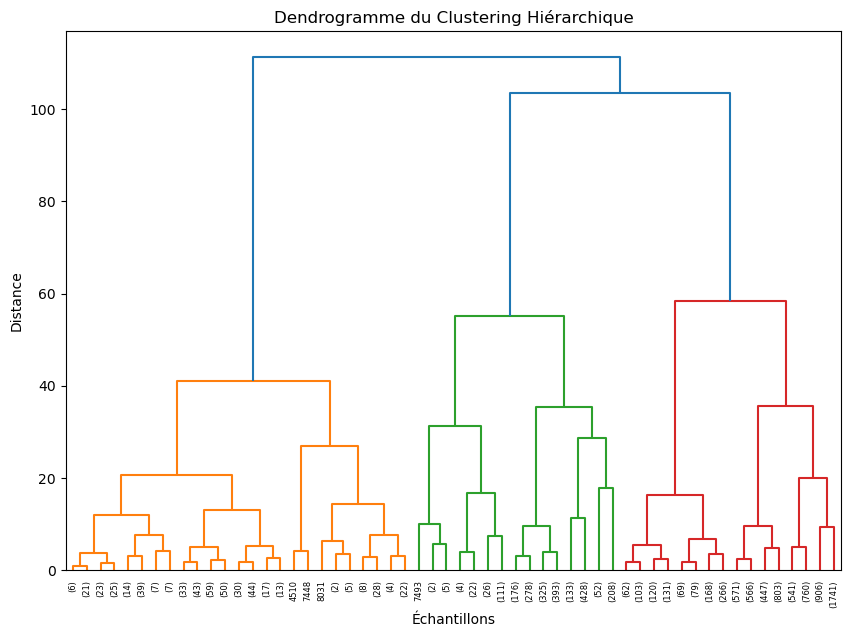

In [43]:
# Échantillonnage des données pour réduire la taille
sample_size = 10000
data_sampled = data.sample(n=min(sample_size, len(data)), random_state=42)

# Normalisation des données
scaler = StandardScaler()
data_sampled_normalized = scaler.fit_transform(data_sampled)

# Clustering hiérarchique
linkage_matrix = linkage(data_sampled_normalized, method='ward', metric='euclidean')

# Visualisation du dendrogramme
plt.figure(figsize=(10, 7))
plt.title('Dendrogramme du Clustering Hiérarchique')
dendrogram(linkage_matrix, labels=None, truncate_mode='level', p=5)
plt.xlabel('Échantillons')
plt.ylabel('Distance')
plt.show()

Nombre de clusters: 21
         delivery_time  approval_time
Cluster                              
1             9.453333       3.000000
2            22.925373       3.104478
3             8.648649       2.000000
4            19.384615       2.000000
5            25.000000      14.500000
6            19.125000       7.125000
7            12.725806       4.419355
8           115.428571       0.285714
9           187.000000       0.000000
10           69.000000       0.000000
11           44.927007       0.000000
12           18.858362       0.000000
13           34.496241       0.000000
14           26.960280       0.000000
15           42.173077       1.480769
16           24.812500       1.000000
17           13.985577       1.000000
18            6.941581       1.000000
19            4.126519       0.000000
20           13.324366       0.000000
21            8.809974       0.000000
Silhouette Score: 0.54


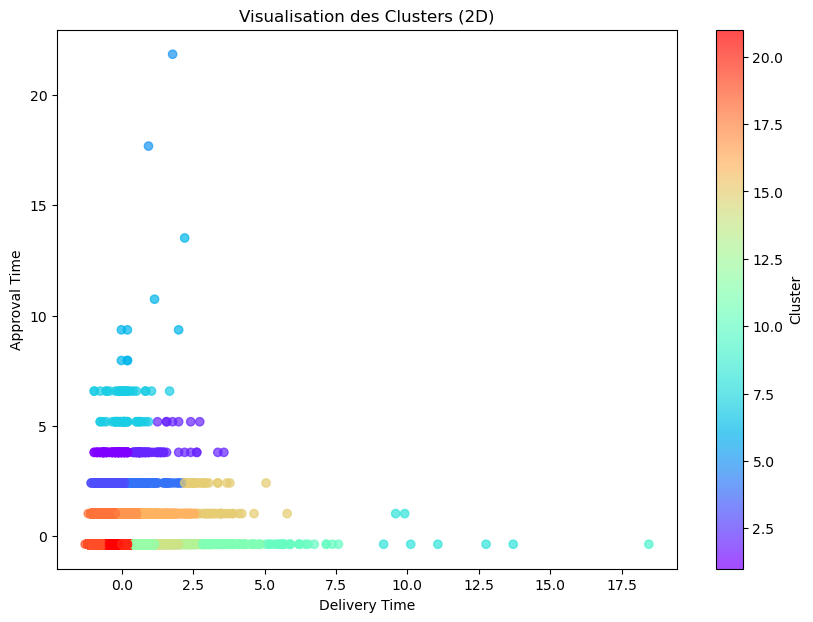

In [44]:
# Déterminer les clusters
threshold = 10  # Ajustez selon l'analyse visuelle du dendrogramme
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Ajouter les clusters au DataFrame
data_sampled['Cluster'] = clusters

# Analyse des clusters
print(f'Nombre de clusters: {len(np.unique(clusters))}')
print(data_sampled.groupby('Cluster').mean())

# Évaluation avec le Silhouette Score
silhouette_avg = silhouette_score(data_sampled_normalized, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Visualisation des clusters
plt.figure(figsize=(10, 7))
plt.title('Visualisation des Clusters (2D)')
plt.scatter(data_sampled_normalized[:, 0], data_sampled_normalized[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.xlabel('Delivery Time')
plt.ylabel('Approval Time')
plt.colorbar(label='Cluster')
plt.show()

## Regression linéaire

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Encodage des variables catégoriques
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Utilisation du nouveau mot-clé sparse_output
encoded_payment_type = encoder.fit_transform(payments_df[["payment_type"]])
encoded_columns = encoder.get_feature_names_out(["payment_type"])

# Ajouter les colonnes encodées au DataFrame
encoded_df = pd.DataFrame(encoded_payment_type, columns=encoded_columns)
payments_df = pd.concat([payments_df.reset_index(drop=True), encoded_df], axis=1)

# Supprimer les colonnes inutiles
X = payments_df.drop(columns=["payment_value", "payment_type", "order_id"])
y = payments_df["payment_value"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficient de régression :", model.coef_)
print("Intercept :", model.intercept_)
print("MSE :", mse)
print("Score R² :", r2)

# Afficher quelques prédictions
predictions = pd.DataFrame({"Valeurs Réelles": y_test, "Prédictions": y_pred}).head()
print("\nExemple de Prédictions :")
print(predictions)

Coefficient de régression : [ -8.12874665  29.48227306 -28.1404377   -1.2941934  -73.03009466
 -33.79643022 -28.1404377   -1.2941934  -73.03009466 -33.79643022]
Intercept : 124.70666290394897
MSE : 38569.68064275928
Score R² : 0.12734334896524324

Exemple de Prédictions :
       Valeurs Réelles  Prédictions
21856            39.60   143.471803
82913           111.42    89.779314
81375            37.37    89.779314
9274             47.96    89.779314
77826           141.88   146.060189


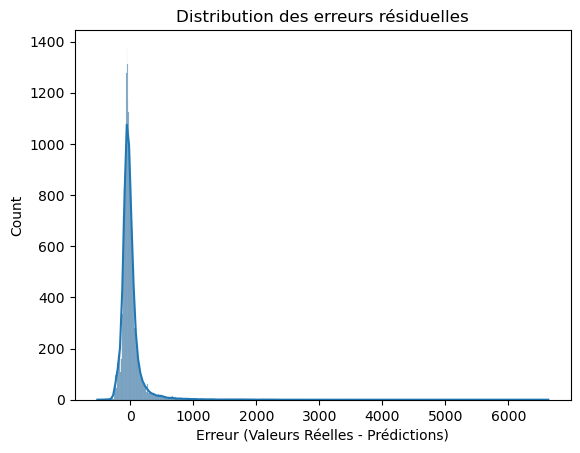

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution des erreurs résiduelles")
plt.xlabel("Erreur (Valeurs Réelles - Prédictions)")
plt.show()


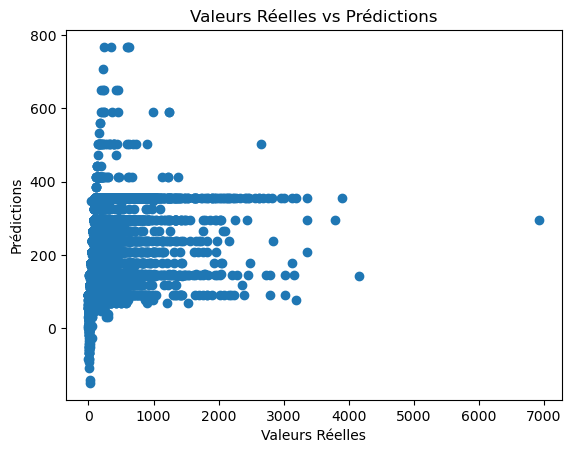

In [22]:
plt.scatter(y_test, y_pred)
plt.title("Valeurs Réelles vs Prédictions")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.show()
